## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.


## Compute the camera calibration using chessboard images and store calibration results

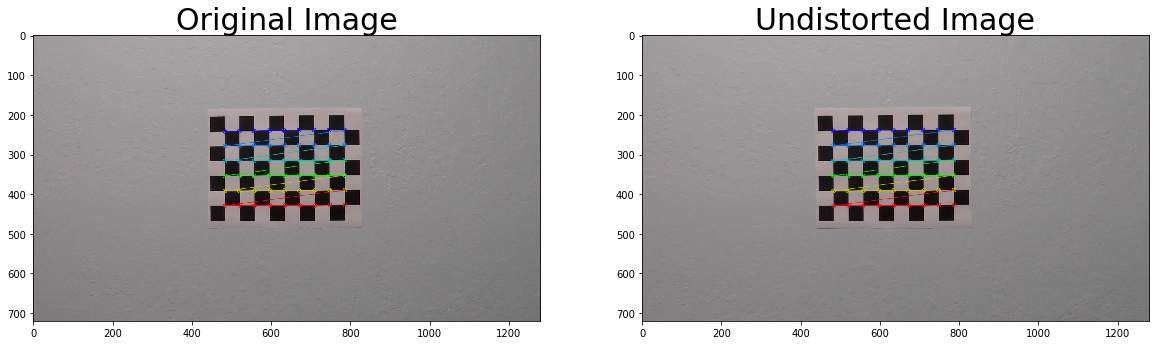

In [1]:
from camera import Camera

%matplotlib inline
# create camera object
camera = Camera()
# calibrate camera and show result
camera.calibrate(9, 6, True)

# Test images - verification

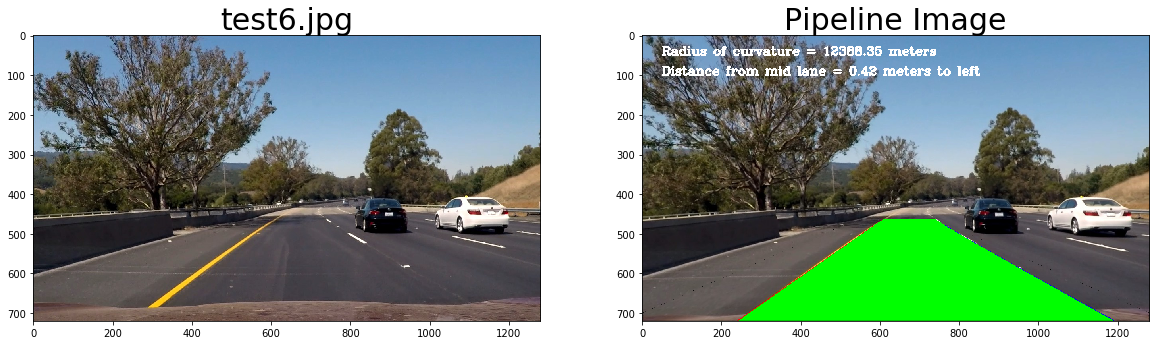

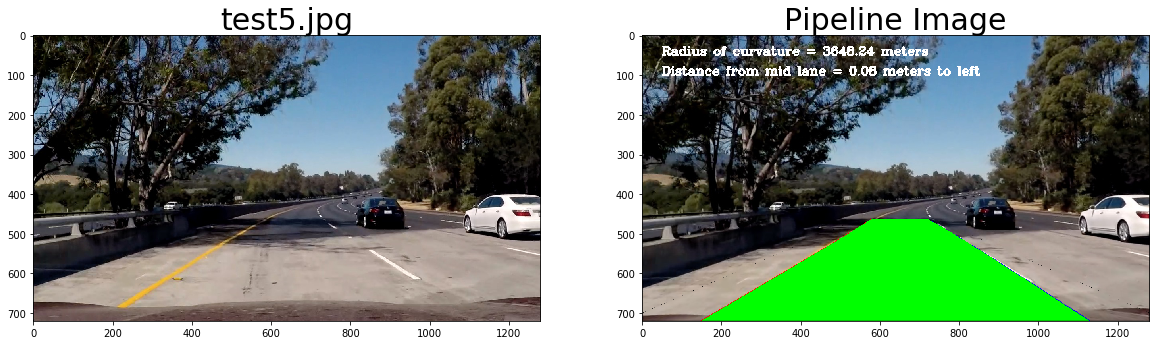

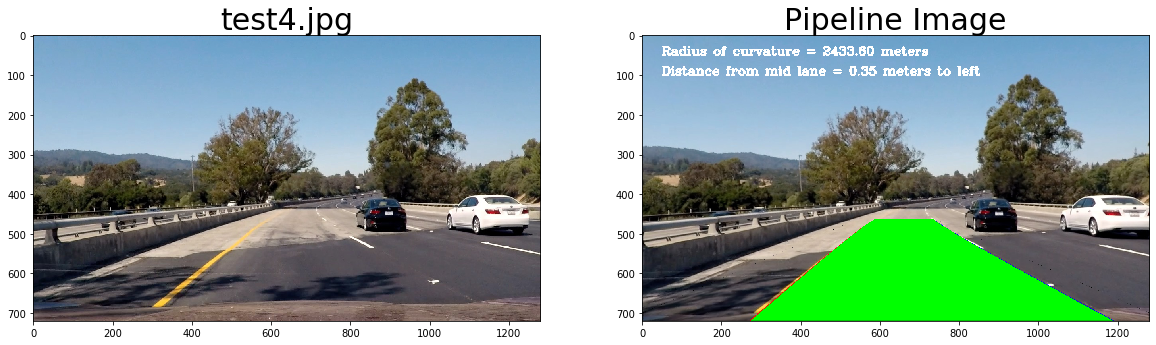

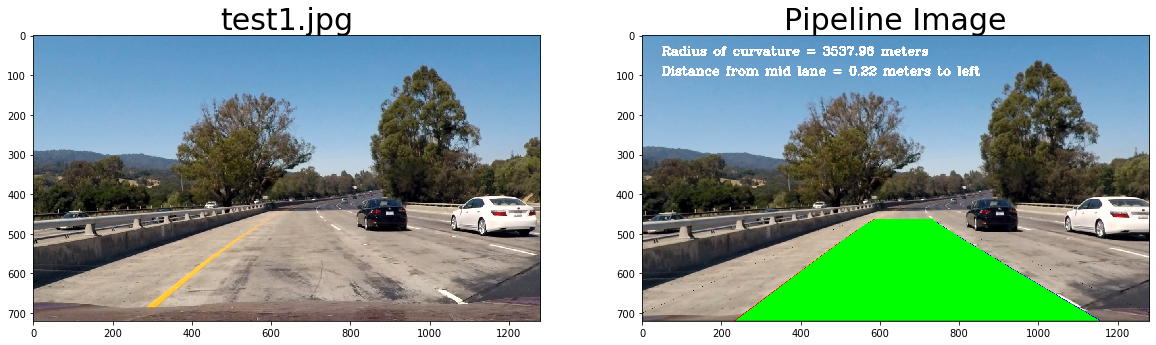

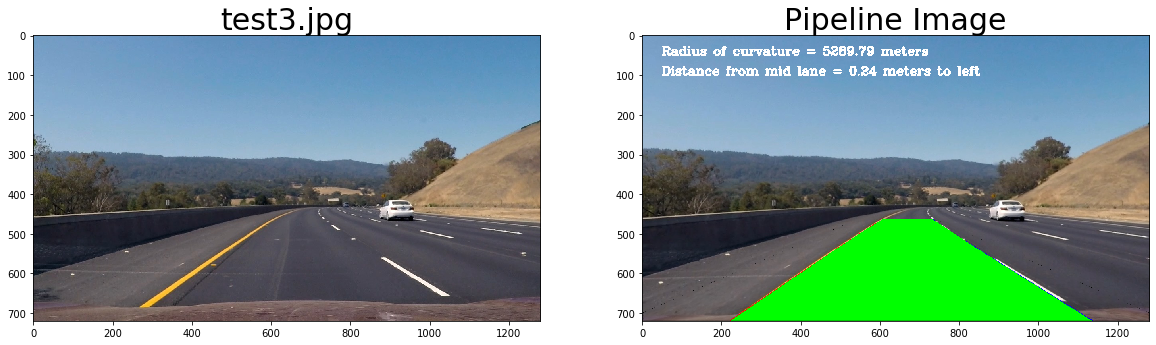

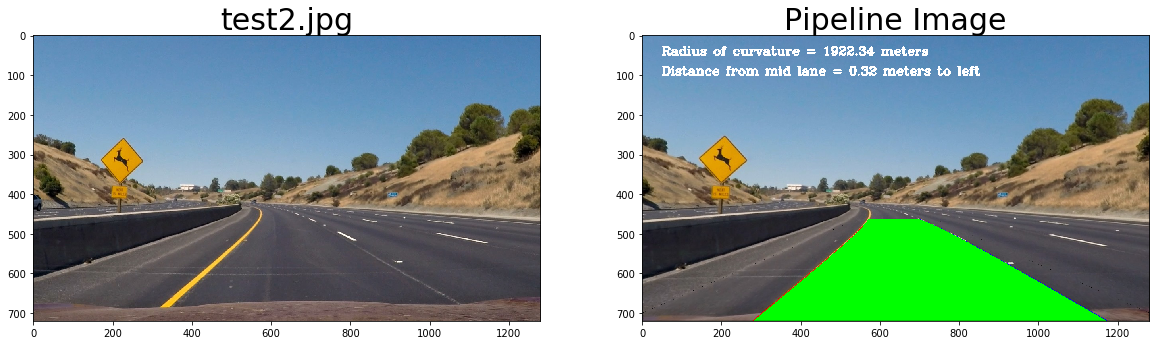

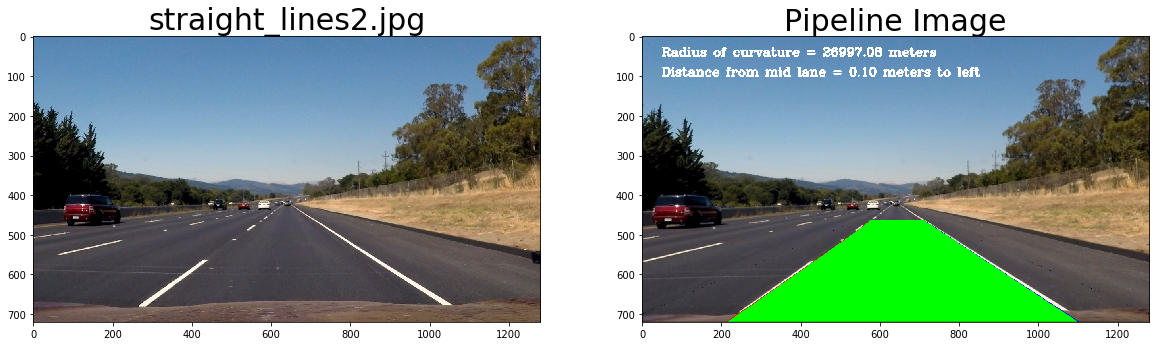

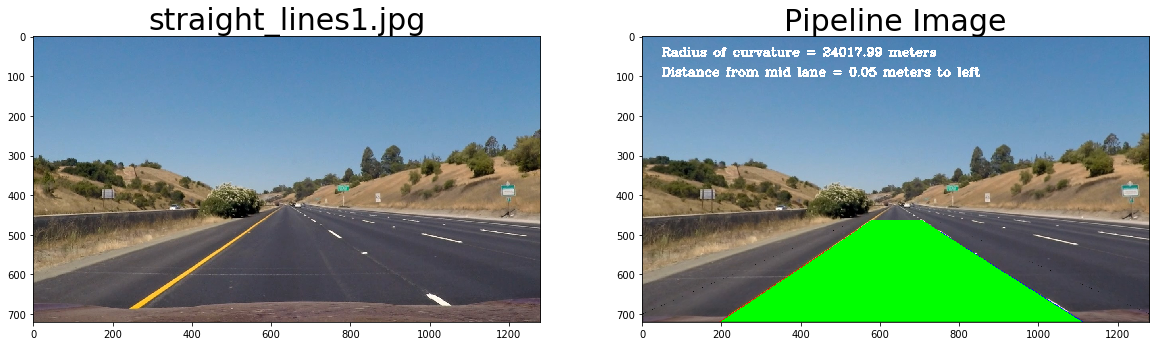

In [4]:
import os
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from graph import Graph
from lane import Lane

images = os.listdir("test_images/")

lane = Lane(lane_width_m=3.7, lane_length_m=30.)
lane.set_camera(camera)

for image_name in images:
    # for each image new Lane object is necessary to clean up the curvature history
    lane = Lane(lane_width_m=3.7, lane_length_m=30.)
    lane.set_camera(camera)
    # load image
    image = mpimg.imread("test_images/" + image_name)
    result = lane.pipeline(image)

    mpimg.imsave("output_images/result_" + image_name, result)
    # Visualize undistortion
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
    ax1.imshow(image)
    ax1.set_title(image_name, fontsize=30)
    ax2.imshow(result, cmap='gray')
    # ax2.plot(result)
    ax2.set_title('Pipeline Image', fontsize=30)
    # f.savefig("output_images/hist_" + image_name)

# Test pipeline on Movie - "project_video.mp4"

In [3]:
### Process movie

# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

lane = Lane(lane_width_m=3.7, lane_length_m=30.)
lane.set_camera(camera)

def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image where lines are drawn on lanes)
    
    binary = lane.pipeline(image)
    #result = Graph.to_3channel_binary(binary)
    #regional = lane.get_region(image)
    
    result = Graph.merge_images((image, binary))
    return binary

white_output = 'output_images/project_video.mp4'

clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

t:   0%|          | 2/1260 [00:00<01:17, 16.28it/s, now=None]

Moviepy - Building video output_images/project_video.mp4.
Moviepy - Writing video output_images/project_video.mp4



Moviepy - Done !
Moviepy - video ready output_images/project_video.mp4
CPU times: user 2min 22s, sys: 12.8 s, total: 2min 35s
Wall time: 1min 49s


In [5]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))